# DA301:  Advanced Analytics for Organisational Impact

### Ryan Brenner

### Overview
Turtle Games is a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. To improve overall sales performance, Turtle Games wants to understand: 
- Part 1: How customers accumulate loyalty points (analysis conducted using Python)
- Part 2: How groups within the customer base can be used to target specific market segments (analysis conducted using Python)
- Part 3: How social data (e.g. customer reviews) can be used to inform marketing campaigns (analysis conducted using Python)
- Part 4: What is the impact that each product has on sales (analysis conducted using R)
- Part 5: The reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (analysis conducted using R)
- Part 6: If there is any possible relationship(s) between North America, Europe, and global sales (analysis conducted using R).

# Part 1: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. The marketing department wants to better understand how users accumulate loyalty points. Investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file.
reviews = pd.read_csv('turtle_reviews.csv')

In [3]:
# View the reviews DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# Any missing values?
reviews_missing = reviews[reviews.isna().any(axis=1)]

reviews_missing.shape

(0, 11)

> There are no missing values.

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews_updated = reviews.drop(['language', 'platform'], axis=1)

# View the updated DataFrame.
reviews_updated.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [8]:
# Rename the column headers for easier referencing.
reviews_updated.rename(columns={'remuneration (k£)':'renumeration', 
                                'spending_score (1-100)':'spending_score'}, inplace=True)

# View the updated column names.
reviews_updated.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews_updated.to_csv('turtle_reviews_updated.csv', index=False)

> The new DataFrame has been saved as a CSV file.

In [10]:
# Import new CSV file with Pandas.
reviews_final = pd.read_csv('turtle_reviews_updated.csv')

# View DataFrame.
reviews_final.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [11]:
# Independent variable.
x = reviews_final['spending_score']

# Dependent variable.
y = reviews_final['loyalty_points']

# OLS model and summary.
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        11:32:13   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The R-squared value of 0.452 shows that spending score alone explains 45.2% of the variability in loyalty points. There appears to be a moderate positive linear relationships between spending score and loyalty points. 

In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the x coefficient and the constant to generate the regression table.

y_pred = (-75.052663) + 33.061693 * reviews_final['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

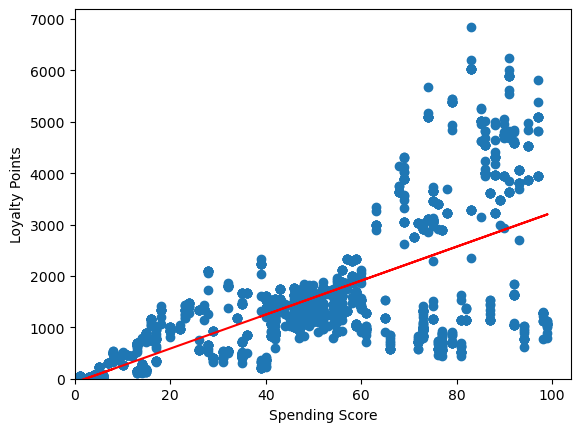

In [14]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in red).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add labels.
plt.xlabel('Spending Score', fontsize=10)
plt.ylabel('Loyalty Points', fontsize=10)

# View and save the plot.
plt.savefig('spending_score.png', dpi=150)

> The plot provides further evidence of a moderate positive linear relationship between spending score and loyalty points. 

In [15]:
# Check for homoscedasticity.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
model = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907725, 'F-test p-value': 2.3037887924501407e-166}


> The LM Test p-value is greater than 0.05, indicating the presence of homoscedasticity.

### 5b) renumeration vs loyalty

In [16]:
# Independent variable.
x = reviews_final['renumeration']

# Dependent variable.
y = reviews_final['loyalty_points']

# OLS model and summary.
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        11:32:14   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The R-squared value of 0.38 shows that renumeration alone explains 38% of the variability in loyalty points. There appears to be a moderate positive linear relationships between renumeration and loyalty points. 

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the x coefficient and the constant to generate the regression table.

y_pred = (-65.686513) + 34.187825 * reviews_final['renumeration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

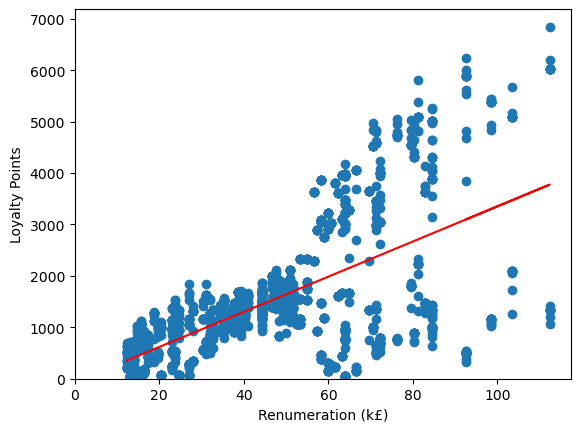

In [19]:
# Plot graph with regression line.
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in red).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add labels.
plt.xlabel('Renumeration (k£)', fontsize=10)
plt.ylabel('Loyalty Points', fontsize=10)

# View and save the plot.
plt.savefig('renumeration.png', dpi=150)

> The plot provides further evidence of a moderate positive linear relationship between renumeration and loyalty points. 

In [20]:
# Check for homoscedasticity.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
model = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219334, 'F-test p-value': 3.68e-320}


> The LM Test p-value is greater than 0.05, indicating the presence of homoscedasticity.

### 5c) age vs loyalty

In [21]:
# Independent variable.
x = reviews_final['age']

# Dependent variable.
y = reviews_final['loyalty_points']

# OLS model and summary.
# Run the OLS test.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0577
Time:                        11:32:14   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The R-squared value of 0.002 shows that age does not explain the variability in loyalty points. There appears to be no relationship between age and loyalty points.

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the x coefficient and the constant to generate the regression table.

y_pred = (1736.517739) + (-4.012805) * reviews_final['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

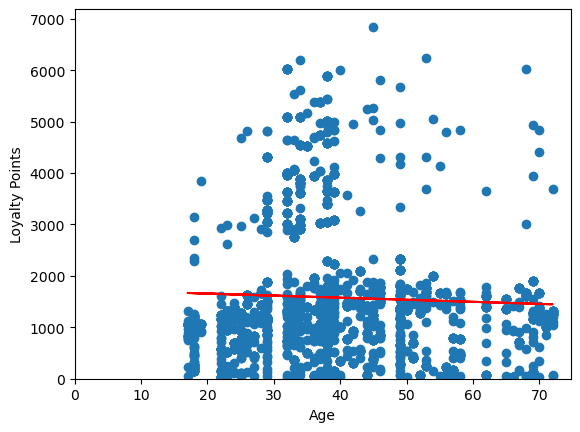

In [24]:
# Plot graph with regression line.
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in red).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add labels.
plt.xlabel('Age', fontsize=10)
plt.ylabel('Loyalty Points', fontsize=10)

# View and save the plot.
plt.savefig('age.png', dpi=150)

> The plot provides further evidence of no relationship between age and loyalty points. 

In [25]:
# Check for homoscedasticity.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
model = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 13.045150861307642, 'LM Test p-value': 0.00030407066519251314, 'F-stat': 13.11766668084642, 'F-test p-value': 0.0002998192355800465}


> The LM Test p-value is less than 0.05, indicating the presence of heteroscedasticity.

> Overall, it appears that spending score and renumeration can help determine how customers accumulate loyalty points. Customer age doesn't help determine how customers accumulate loyalty points.

# 

# Part 2: Clustering with *k*-means using Python

The marketing department wants to better understand the usefulness of renumeration and spending scores. Identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the data.
reviews_final = pd.read_csv('turtle_reviews_updated.csv')

# View DataFrame.
reviews_final.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [28]:
# Drop unnecessary columns.
df2 = reviews_final.drop(columns=['gender', 'age', 'loyalty_points', 'education',
                                 'product', 'review', 'summary'])

# View DataFrame.
df2.head()

,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [29]:
# Explore the data.
print(df2.columns)
df2.info()

Index(['renumeration', 'spending_score'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [30]:
# Descriptive statistics.
df2.describe()

,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

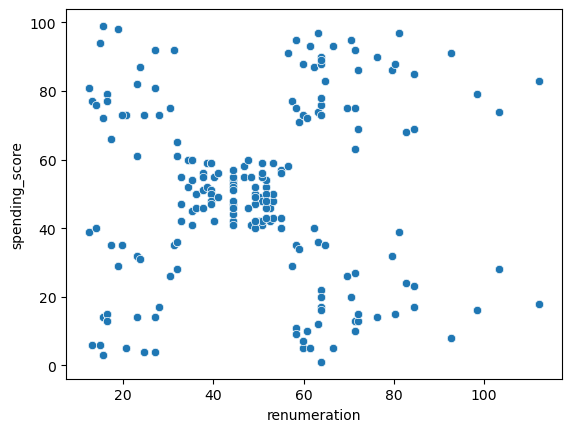

In [31]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2)

> There appear to be 5 clusters in the data based on the scatterplot above.

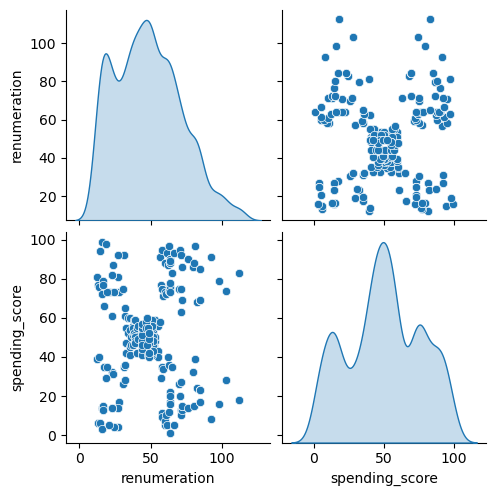

In [32]:
# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

> Similar to the scatterplot above, the pairplot shows approximately 5 clusters within the data.

## 3. Elbow and silhoutte methods

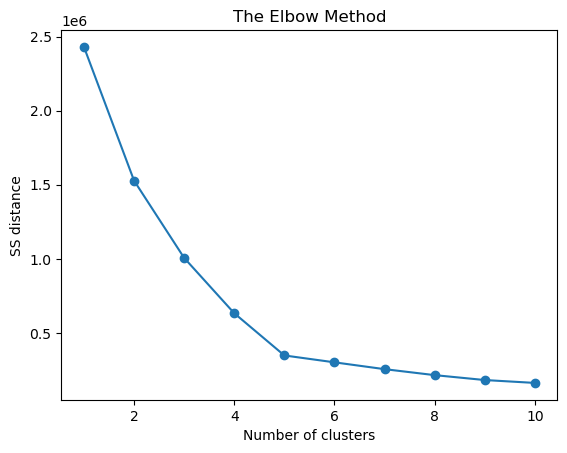

In [33]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

> The elbow method shows that the optimal number of clusters is likely 5. This is because 5 represents the sharpest bend in the above visualisation. Using a higher number of clusters would likely lead to over-fitting the model. 

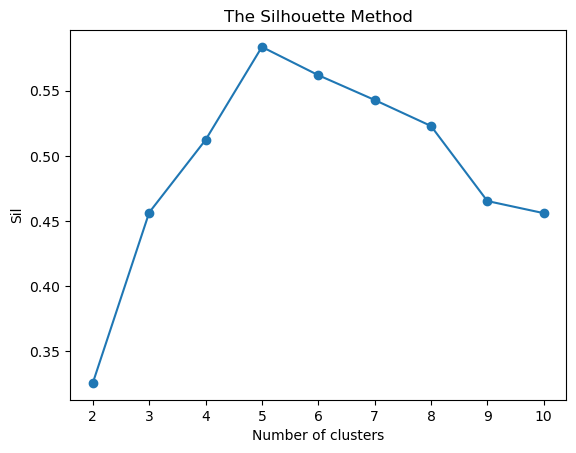

In [34]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

> The silhouette method shows that the optimal number of clusters is likely 5. This is because 5 is where the silhouette value is highest, demonstrating the highest cohesion among the various clusters.

## 4. Evaluate k-means model at different values of *k*

Given that the elbow and silhouette methods both show the likely optimal number of clusters is 5, I decided to evaluate k-means models with k values of 4, 5, and 6 to compare the usefulness of each. 

#### Set `k=4` (four clusters)

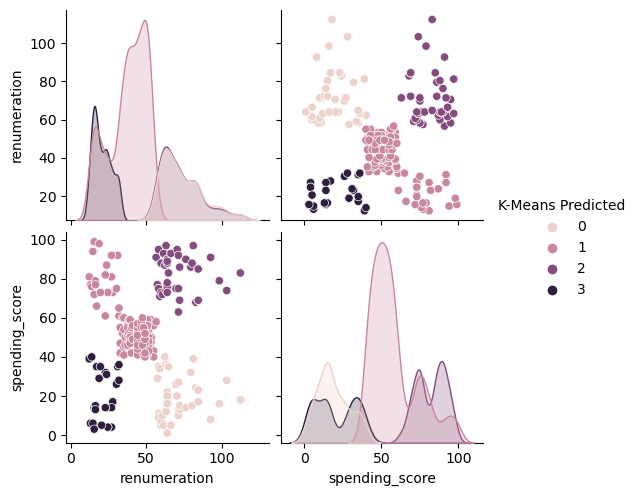

In [35]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [36]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

#### Set `k=5` (five clusters)

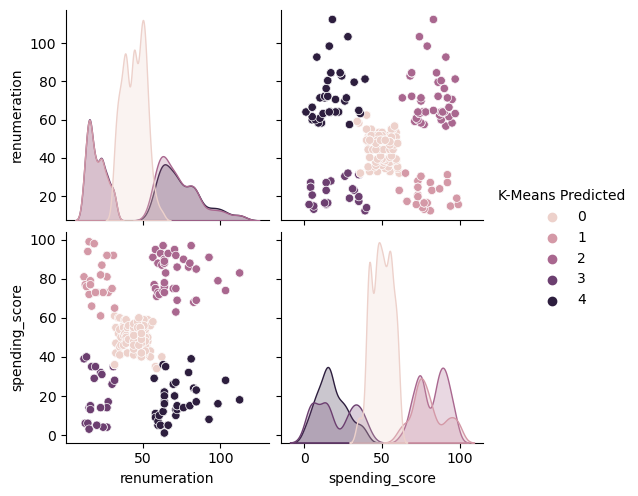

In [37]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [38]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

#### Set `k=6` (six clusters)

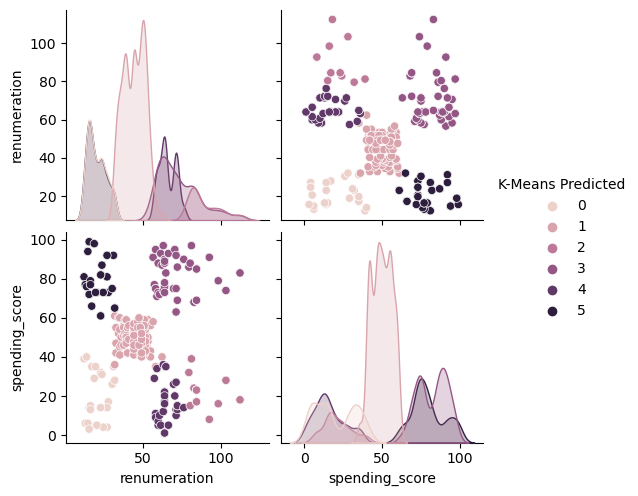

In [39]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [40]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
3    356
0    271
5    269
4    214
2    123
Name: K-Means Predicted, dtype: int64

> Based on the various outputs from the models using 4, 5 and 6 clusters, it appears that the most appropriate number of clusters would be 5. Visually, there are 5 distinct clusters in the data, and using a k-means model with a value of `k=5` shows clear separation of the various clusters. Also, excluding the cluster labeled as '0' which is very dense, the value counts for the remaining clusters show that the clusters are relatively similar in size when `k=5`. Furthermore, both the elbow and silhouette methods clearly show that `k=5` is the optimal number of clusters. Therefore, I will use 5 clusters in the final model.

## 5. Fit final model.

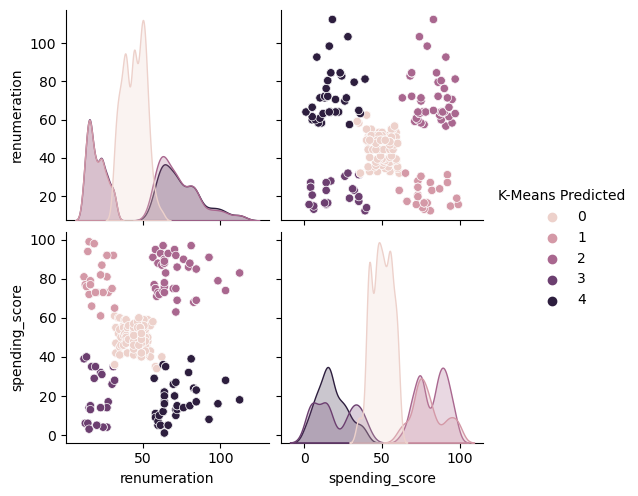

In [41]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [42]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [43]:
# View the K-Means predicted.
x.head()

,renumeration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3


Text(0, 0.5, 'Spending Score')

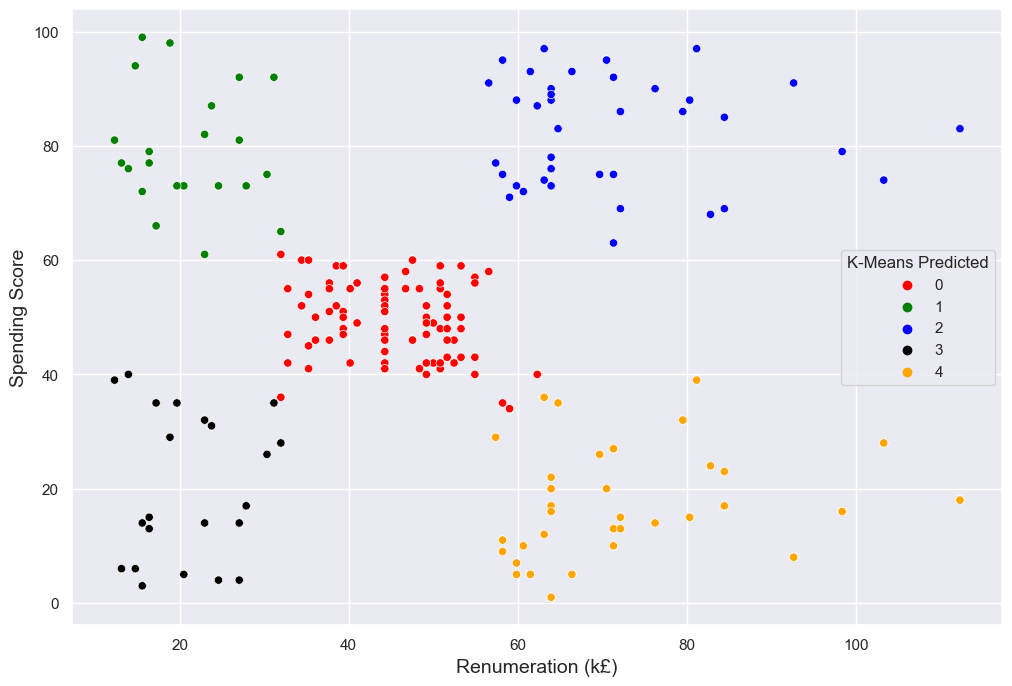

In [44]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
cluster_plot = sns.scatterplot(x='renumeration',
                y='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# Specify and format the labels.
cluster_plot.set_xlabel("Renumeration (k£)", fontsize=14)
cluster_plot.set_ylabel("Spending Score", fontsize=14)

In [45]:
# Save the cluster_plot visualisation as a PNG file.
fig_cp = cluster_plot.get_figure()
fig_cp.set_size_inches(15, 12)
fig_cp.savefig('clusters.png', dpi=150)

## 7. Insights and observations

Based on the above visualisation, there appear to be ***5*** distinct customer groups. Customers that earn less income (between approximately £10K and £30K) are split into two separate groups, one with a higher spending score (60-100) and one that is lower (1-40). Customers that earn approximately £30K to £60K have a medium spending score between about 40 and 60. Customers that earn a higher income (£60K and higher) are split into two separate groups, one with a higher spending score (60-100) and one that is lower (1-40). 

# 

# Part 3: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department would like to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website.

## 1. Load and explore the data

In [46]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Load the data.
reviews_final = pd.read_csv('turtle_reviews_updated.csv')

# Drop the product column.
df3 = reviews_final.drop(columns=['product'])

# View DataFrame.
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   review          2000 non-null   object 
 7   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,review,summary
0,Male,18,12.30,39,210,graduate,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,As my review of GF9's previous screens these w...,Money trap


In [48]:
# Determine if there are any missing values in the review column.
df3['review'].isna().sum()

0

> There are no missing values in the review column.

In [49]:
# Determine if there are any missing values in the summary column.
df3['summary'].isna().sum()

0

> There are no missing values in the summary column.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [50]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [51]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [52]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [53]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in the review and summary columns

In [54]:
# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()

50

In [55]:
# Check the number of duplicate values in the summary column.
df3.summary.duplicated().sum()

649

In [56]:
# Drop duplicates in both columns.
df4 = df3.drop_duplicates(subset=['review', 'summary'])
df4.reset_index(inplace=True)

# Preview data.
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1961 non-null   int64  
 1   gender          1961 non-null   object 
 2   age             1961 non-null   int64  
 3   renumeration    1961 non-null   float64
 4   spending_score  1961 non-null   int64  
 5   loyalty_points  1961 non-null   int64  
 6   education       1961 non-null   object 
 7   review          1961 non-null   object 
 8   summary         1961 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 138.0+ KB
None


,index,gender,age,renumeration,spending_score,loyalty_points,education,review,summary
0,0,Male,18,12.30,39,210,graduate,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,Male,23,12.30,81,524,graduate,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,Female,22,13.12,6,40,graduate,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,Female,25,13.12,77,562,graduate,amazing buy bought it as a gift for our new dm...,five stars
4,4,Female,33,13.94,40,366,graduate,as my review of gf9s previous screens these we...,money trap


> The rows with duplicate entries in the `review` and `summary` columns have been removed from the DataFrame. This only applies to rows where the duplicates existed across both the `review` *and* `summary` columns.

## 3. Tokenise

In [57]:
# Create new DataFrame (copy DataFrame).
df5 = df4

# View DataFrame.
df5.head()

,index,gender,age,renumeration,spending_score,loyalty_points,education,review,summary
0,0,Male,18,12.30,39,210,graduate,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,Male,23,12.30,81,524,graduate,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,Female,22,13.12,6,40,graduate,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,Female,25,13.12,77,562,graduate,amazing buy bought it as a gift for our new dm...,five stars
4,4,Female,33,13.94,40,366,graduate,as my review of gf9s previous screens these we...,money trap


In [58]:
# Tokenise the words in the reviews column.
df5['review_tokens'] = df5['review'].apply(word_tokenize)

# Tokenise the words in the summary column.
df5['summary_tokens'] = df5['summary'].apply(word_tokenize)

# Preview data.
df5.head()

,index,gender,age,renumeration,spending_score,loyalty_points,education,review,summary,review_tokens,summary_tokens
0,0,Male,18,12.30,39,210,graduate,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,Male,23,12.30,81,524,graduate,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,Female,22,13.12,6,40,graduate,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,Female,25,13.12,77,562,graduate,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,Female,33,13.94,40,366,graduate,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


## 4. Frequency distribution
### 4a) Create frequency distribution

In [59]:
# Determine the frequency distribution in the reviews column.
all_reviews = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_reviews = all_reviews + df5['review_tokens'][i]

# Calculate the frequency distribution.
fdist_reviews = FreqDist(all_reviews)

# Preview data.
fdist_reviews

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [60]:
# Determine the frequency distribution in the summary column.
all_summaries = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_summaries = all_summaries + df5['summary_tokens'][i]

# Calculate the frequency distribution.
fdist_summaries = FreqDist(all_summaries)

# Preview data.
fdist_summaries

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

> Many of the most frequently used words in the review and summary columns are stopwords ("the", "a", etc.).

### 4b) Filter out tokens that are neither alphabetic nor numberic (to eliminate punctuation marks, etc.) and remove stopwords.

In [61]:
# Delete all the non-alpanum characters in the review column.
rev_tokens = [word for word in all_reviews if word.isalnum()]

In [62]:
# Delete all the non-alpanum characters in the summary column.
sum_tokens = [word for word in all_summaries if word.isalnum()]

In [63]:
# Remove all the stopwords in the review column.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
rev_tokens2 = [x for x in rev_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
rev_tokens2_string = ''

for value in rev_tokens2:
    # Add each filtered token word to the string.
    rev_tokens2_string = rev_tokens2_string + value + ' '

In [64]:
# Remove all the stopwords in the summary column.
# Create a filtered list of tokens without stopwords.
sum_tokens2 = [x for x in sum_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
sum_tokens2_string = ''

for value in sum_tokens2:
    # Add each filtered token word to the string.
    sum_tokens2_string = sum_tokens2_string + value + ' '

### 4c) Create wordclouds without stopwords

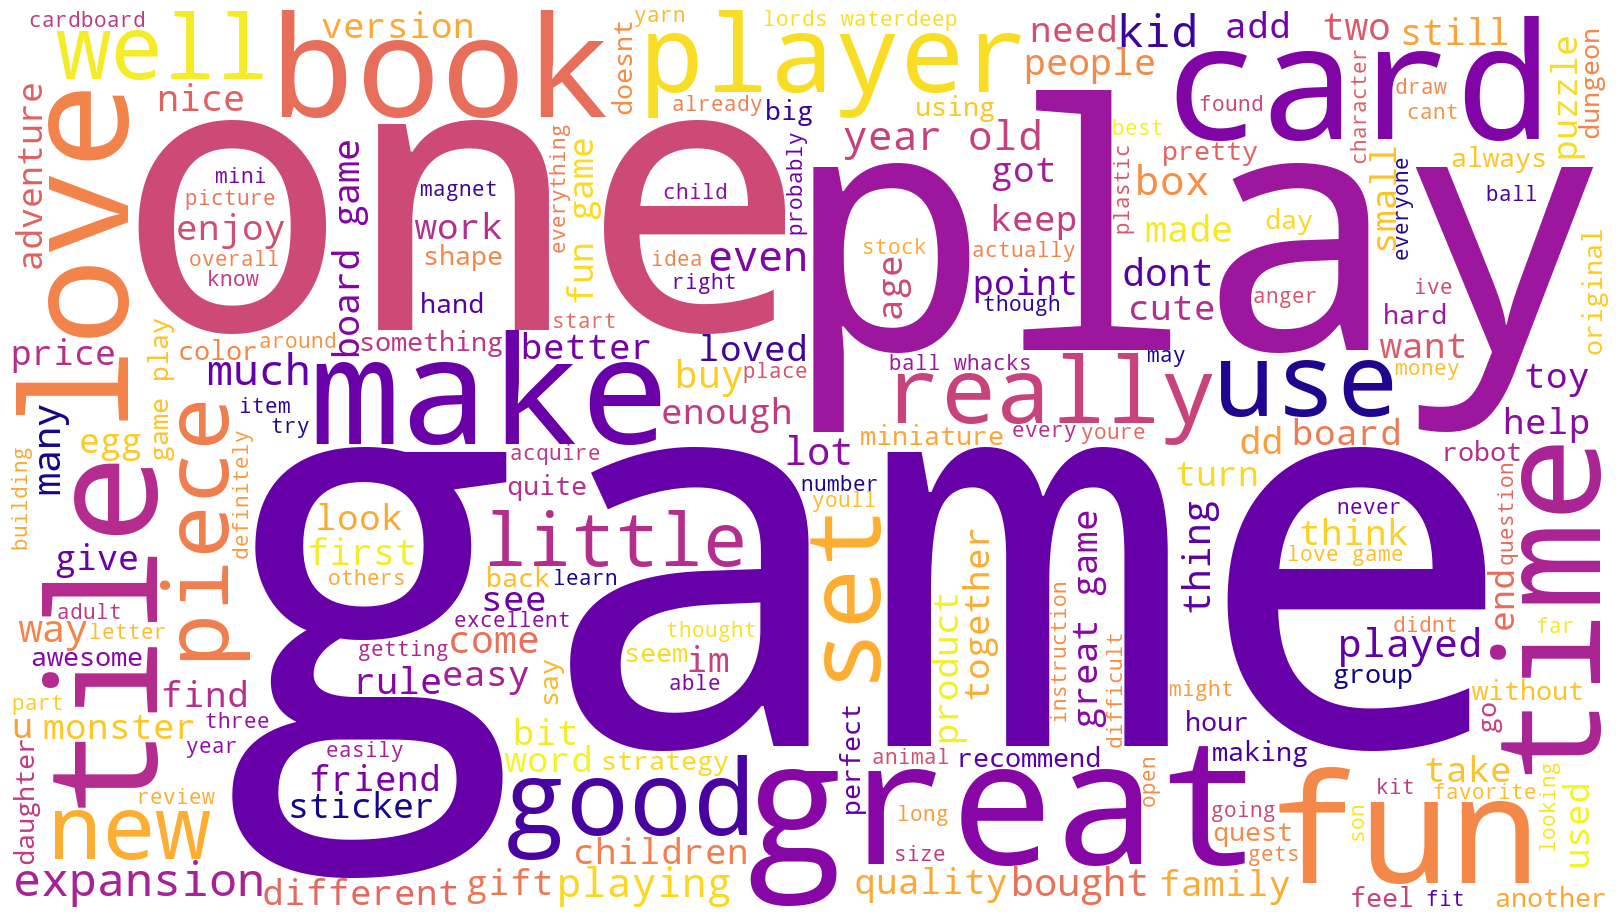

In [65]:
# Create a wordcloud for the review column.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(rev_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

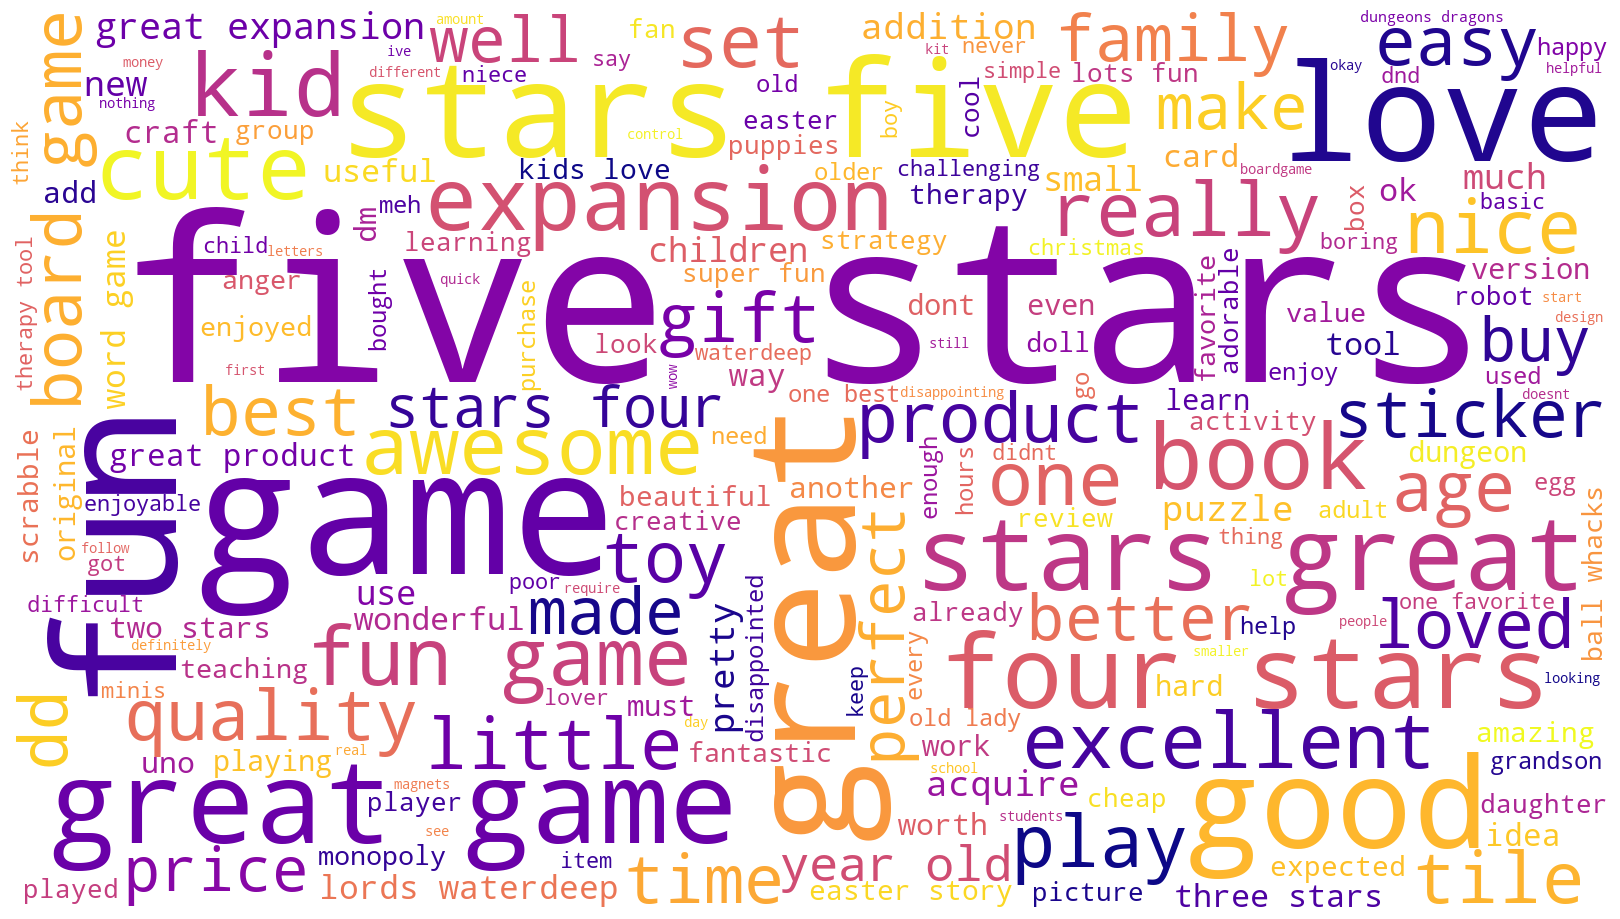

In [66]:
# Create a wordcloud for the summary column.
wordcloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(sum_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

> In both wordclouds the largest words are those that are used most frequently in their respective columns. The largest words generally appear to have positive or neutral sentiments.

### 4d) Identify the 15 most commonly used words in the review and summary columns

In [67]:
# Determine the 15 most common words in the review column.
# Generate a DataFrame from Counter.
rev_counts = pd.DataFrame(Counter(rev_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


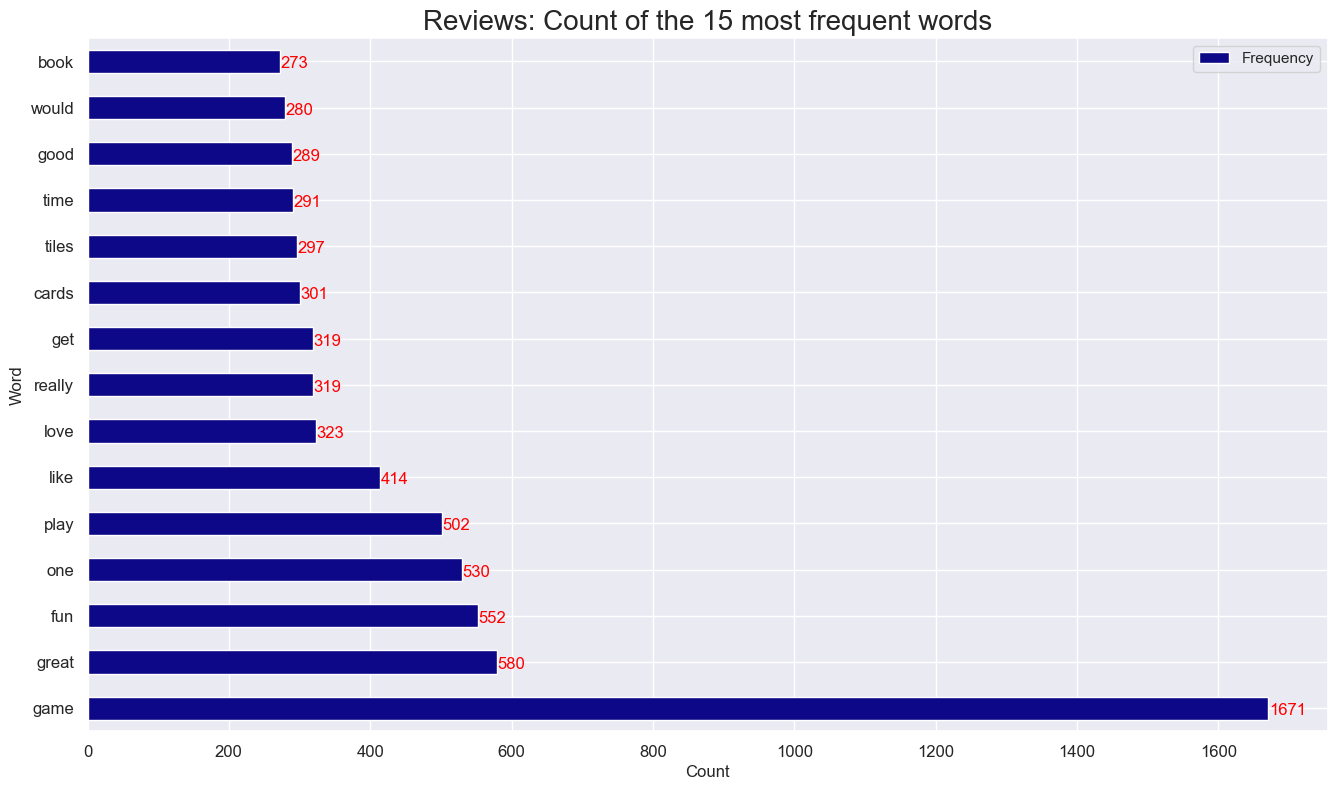

In [68]:
# Visualise the most frequently used words in the review column.

# Set the plot type.
ax = rev_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

> The 15 most frequently used words in the review column appear to have positive or neutral sentiments.

In [69]:
# Save the Reviews word count visualisation as a PNG file.
fig_reviews = ax.get_figure()
fig_reviews.set_size_inches(15, 12)
fig_reviews.savefig('reviews.png', dpi=150)

In [70]:
# Determine the 15 most common words in the summary column.
# Generate a DataFrame from Counter.
sum_counts = pd.DataFrame(Counter(sum_tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


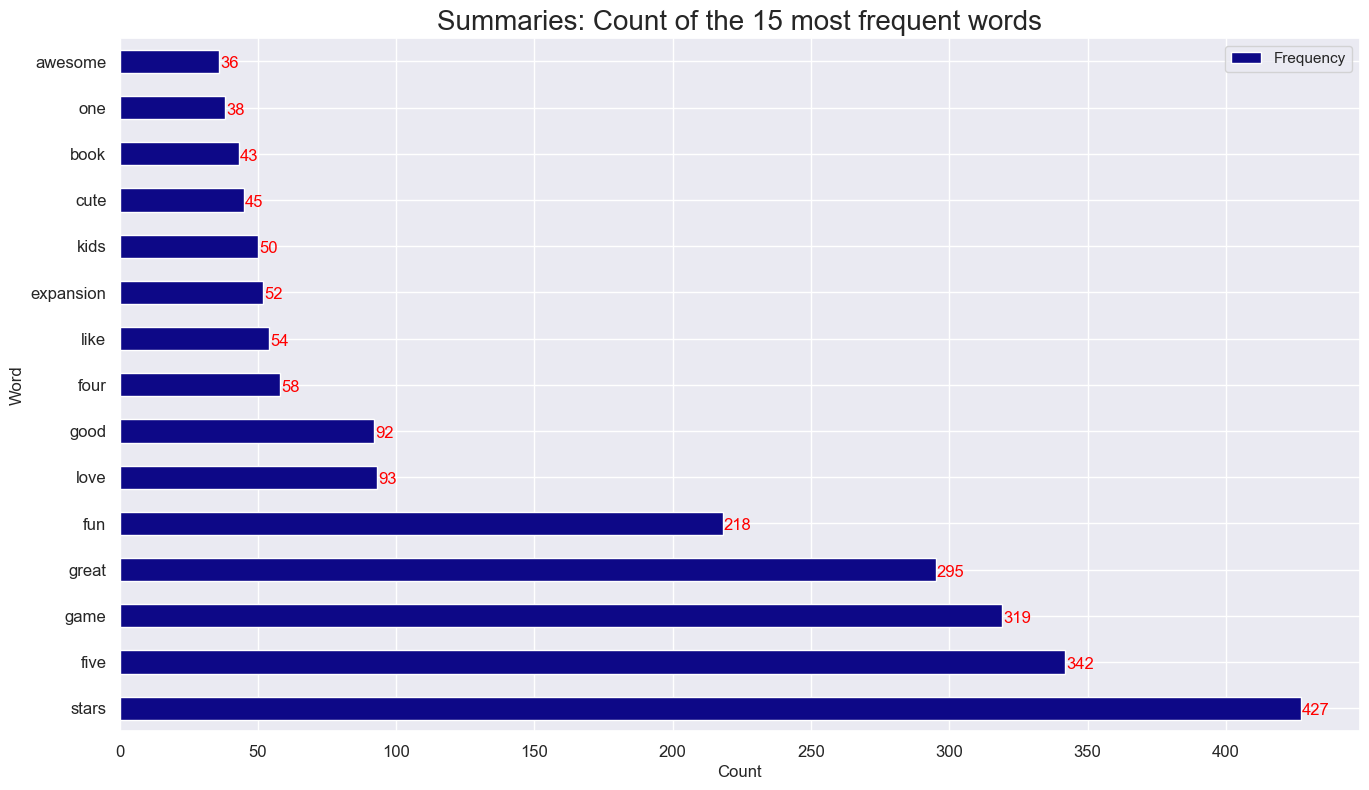

In [71]:
# Visualise the most frequently used words in the review column.

# Set the plot type.
ax = sum_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summaries: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

> The 15 most frequently used words in the summary column appear to have positive or neutral sentiments.

In [72]:
# Save the Summaries word count visualisation as a PNG file.
fig_summaries = ax.get_figure()
fig_summaries.set_size_inches(15, 12)
fig_summaries.savefig('summaries.png', dpi=150)

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [73]:
# Define a function to extract polarity scores.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [74]:
# Determine polarity of the review column. 
# Populate a new column with polarity scores for each review.
df5['rev_polarity'] = df5['review'].apply(generate_polarity)

# Preview the result.
df5['rev_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rev_polarity, dtype: float64

In [75]:
# Determine polarity of the summary column. 
# Populate a new column with polarity scores for each summary.
df5['sum_polarity'] = df5['summary'].apply(generate_polarity)

# Preview the result.
df5['sum_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: sum_polarity, dtype: float64

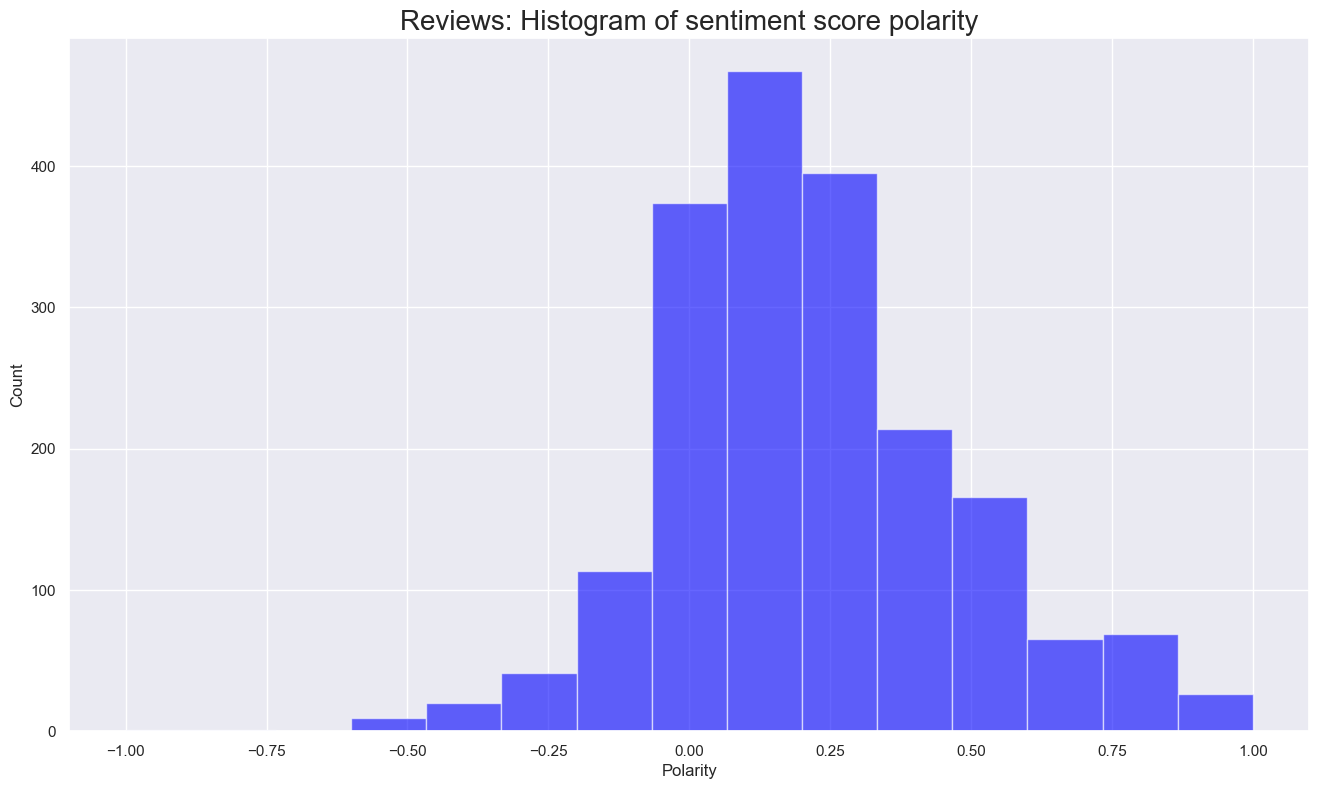

In [76]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['rev_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reviews: Histogram of sentiment score polarity', fontsize=20)

plt.show()

> The majority of the reviews appear to have a polarity of 0 or more, meaning most have a neutral or positive sentiment.

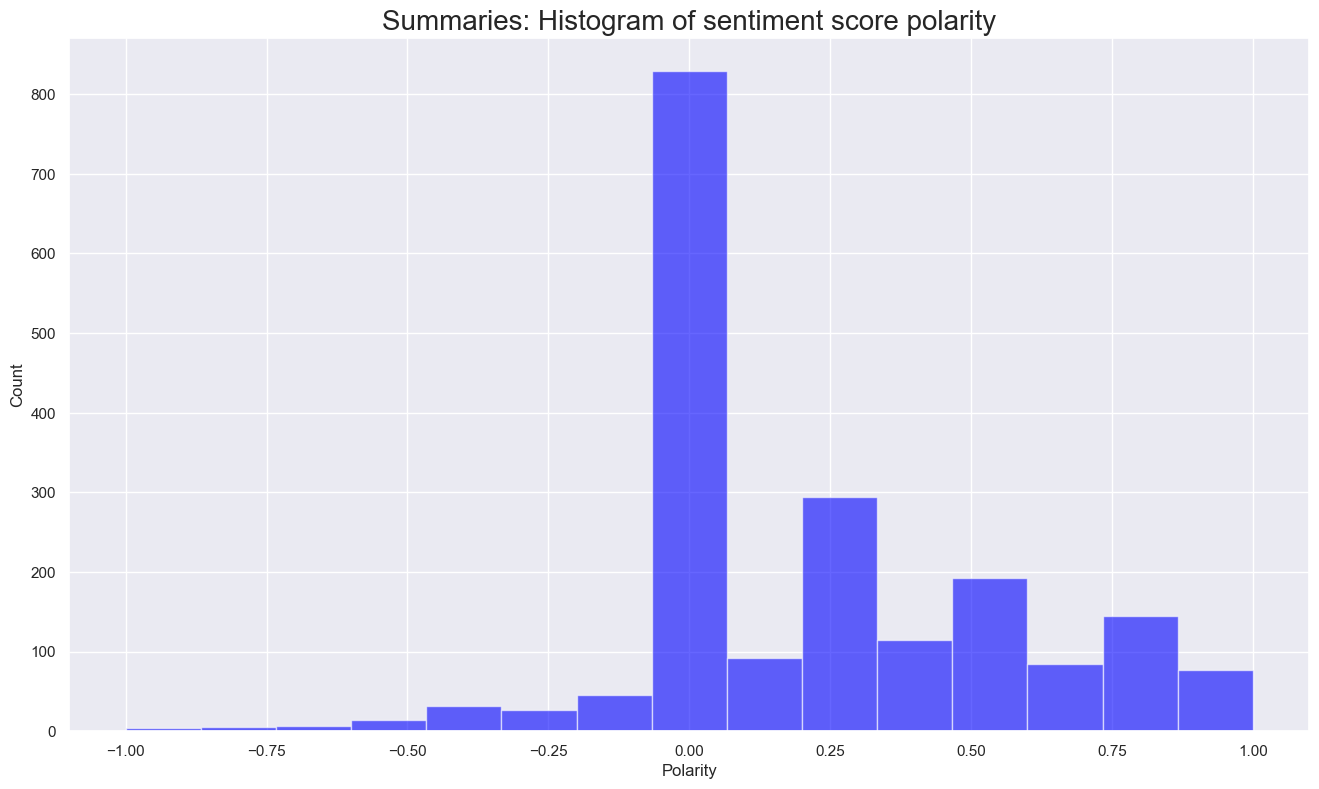

In [77]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['sum_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summaries: Histogram of sentiment score polarity', fontsize=20)

plt.show()

> The majority of the summaries appear to have a polarity of 0 or more, meaning most have a neutral or positive sentiment.

## 6. Visualise the proportion of positive, neutral and negative sentiment in each column.

In [78]:
# Categorise polarity scores as positive, neutral or negative.
filter_method = lambda x: 'Positive' if x >= 0.05 else 'Neutral' if (x < 0.05 and x > -0.05) \
else 'Negative' if x <= -0.05 else None

# Apply the filter method to the rev_polarity column.
df5['rev_sentiment_category'] = df5['rev_polarity'].apply(filter_method)

# Apply the filter method to the sum_polarity column.
df5['sum_sentiment_category'] = df5['sum_polarity'].apply(filter_method)

# View the DataFrame.
df5.head()

,index,gender,age,renumeration,spending_score,loyalty_points,education,review,summary,review_tokens,summary_tokens,rev_polarity,sum_polarity,rev_sentiment_category,sum_sentiment_category
0,0,Male,18,12.30,39,210,graduate,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15,Neutral,Positive
1,1,Male,23,12.30,81,524,graduate,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80,Neutral,Negative
2,2,Female,22,13.12,6,40,graduate,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00,Positive,Neutral
3,3,Female,25,13.12,77,562,graduate,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00,Positive,Neutral
4,4,Female,33,13.94,40,366,graduate,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00,Negative,Neutral


In [79]:
# View the value counts for each sentiment category for reviews.
df5['rev_sentiment_category'].value_counts()

Positive    1452
Neutral      285
Negative     224
Name: rev_sentiment_category, dtype: int64

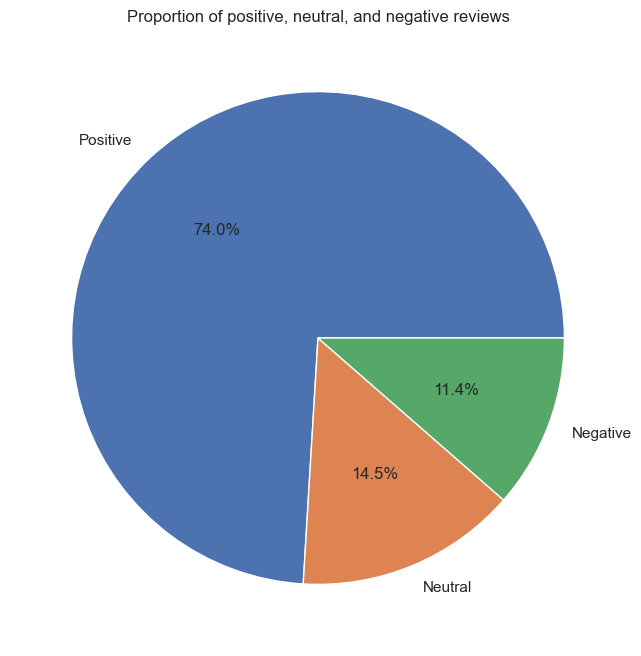

In [80]:
# Review: Create a pie chart to show the proportion of positive, neutral and negative polarity scores. 
# Create labels.
labels = 'Positive', 'Neutral', 'Negative'

plt.pie(df5['rev_sentiment_category'].value_counts(), labels = labels, autopct='%1.1f%%')

# Set title.
plt.title('Proportion of positive, neutral, and negative reviews')

# View and save the plot.
plt.savefig('reviews_pie.png', dpi=150)

> The vast majority (74%) of reviews have a positive sentiment.

In [81]:
# View the value counts for each sentiment category for summaries.
df5['sum_sentiment_category'].value_counts()

Positive    1013
Neutral      777
Negative     171
Name: sum_sentiment_category, dtype: int64

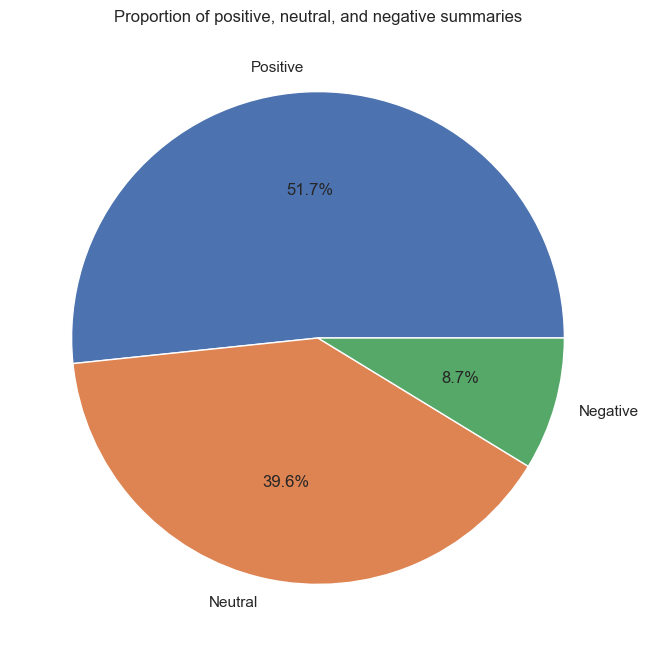

In [82]:
# Summary: Create a pie chart to show the proportion of positive, neutral and negative sentiment.
plt.pie(df5['sum_sentiment_category'].value_counts(), labels = labels, autopct='%1.1f%%')

# Set title.
plt.title('Proportion of positive, neutral, and negative summaries')

# View and save the plot.
plt.savefig('summaries_pie.png', dpi=150)

> The majority of the summaries (51.7%) are positive, and a large proportion (39.6%) are neutral. Across all the reviews and summaries, there appear to be relatively few with negative sentiment.

#

## 7. Identify top 20 positive and negative reviews and summaries respectively.

In [83]:
# Top 20 positive reviews.
# Create a DataFrame. Extract the rows with the 20 hightest polarity scores.
positive_sentiment = df5.nlargest(20, 'rev_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'rev_polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '300px'})

,review,rev_polarity
7,came in perfect condition,1.000000
164,awesome book,1.000000
193,awesome gift,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000
517,perfect just what i ordered,1.000000
583,wonderful product,1.000000
601,delightful product,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000
782,perfect,1.000000
923,awesome,1.000000


> The 20 most positive reviews have a polarity score of 1, meaning they are highly positive.

In [84]:
# Top 20 positive summaries.
# Create a DataFrame. Extract the rows with the 20 hightest polarity scores.
positive_sentiment = df5.nlargest(20, 'sum_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'sum_polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '300px'})

,summary,sum_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
133,perfect for preschooler,1.000000
139,awesome sticker activity for the price,1.000000
160,awesome book,1.000000
162,he was very happy with his gift,1.000000
186,awesome,1.000000
209,awesome and welldesigned for 9 year olds,1.000000


> The 20 most positive summaries have a polarity score of 1, meaning they are highly positive.

> It is imporant to note that polarity scores are not always accurate. In the table above, a summary saying "not the best quality" was assigned a polarity score of 1, inaccurately describing it as having positive sentiment.

In [85]:
# Top 20 negative reviews.
# Create a DataFrame. Extract the rows with the 20 lowest polarity scores.
negative_sentiment = df5.nsmallest(20, 'rev_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'rev_polarity']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '300px'})

,review,rev_polarity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
226,this was a gift for my daughter i found it difficult to use,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


> The 20 most negative reviews range from a polarity score of -0.4 to -1, meaning they range from being moderately negative to being highly negative.

In [86]:
# Top 20 negative summaries.
# Create a DataFrame. Extract the rows with the 20 lowest polarity scores.
negative_sentiment = df5.nsmallest(20, 'sum_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'sum_polarity']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '300px'})

,summary,sum_polarity
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming methods,-0.700000


> The 20 most negative summaries range from a polarity score of -0.59 to -1, meaning they range from being moderately negative to being highly negative.

# 